In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Configuration ---
DATA_FOLDER = './data_production_5_years' 

# --- Load Data ---
try:
    customers_df = pd.read_csv(os.path.join(DATA_FOLDER, 'customers.csv'))
    products_df = pd.read_csv(os.path.join(DATA_FOLDER, 'products.csv'))
    stores_df = pd.read_csv(os.path.join(DATA_FOLDER, 'stores.csv'))
    orders_df = pd.read_csv(os.path.join(DATA_FOLDER, 'orders.csv'))
    lineitems_df = pd.read_csv(os.path.join(DATA_FOLDER, 'lineitems.csv'))
    print("✅ Data loaded successfully!")
except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}")
    print(f"Please make sure the folder '{DATA_FOLDER}' exists and contains the CSV files.")

# Display the first few rows of each dataframe to verify
print("\n--- Customers ---")
display(customers_df.head())
print("\n--- Products ---")
display(products_df.head())
print("\n--- Orders ---")
display(orders_df.head())
print("\n--- Lineitems ---")
display(lineitems_df.head())
print("\n--- Stores ---")
display(stores_df.head())

✅ Data loaded successfully!

--- Customers ---


,customer_id,name,email,gender,age,location,join_date,persona
0,1,Rose Briggs,randallkimberly@example.org,Male,35,Bengaluru,2023-01-27,Tech Enthusiast
1,2,Gwendolyn Dyer,daniel12@example.org,Male,19,Jodhpur,2022-05-23,Family Shopper
2,3,John Marshall,lparsons@example.org,Female,20,Jodhpur,2024-05-26,Fashionista
3,4,Mrs. Rose Matthews,andrewsanders@example.net,Male,19,Mumbai,2021-01-23,Family Shopper
4,5,Daniel Webster,michael50@example.com,Male,20,Bengaluru,2022-12-05,Family Shopper



--- Products ---


,sku_id,product_id,product_code,price,product_name,description,category,brand,rating
0,1,P00001,EL-00001,148196.60,"Apple iPhone 15 Pro (Black Titanium, 256 GB)","A17 Pro Chip, 6 Core Processor",Electronics,Apple,4.8
1,2,P00002,EL-00002,2807.04,Apple USB-C Power Adapter,"20W, Fast Charging, Lightweight Design",Electronics,Apple,4.7
2,3,P00003,EL-00003,113429.30,Samsung Galaxy S25 Ultra,"Snapdragon 8 Elite processor, custom-tuned for...",Electronics,Samsung,4.9
3,4,P00004,EL-00004,15521.41,Samsung Galaxy Buds 3 Pro,Crystal clear 24bit/96kHz studio quality sound.,Electronics,Samsung,4.0
4,5,P00005,EL-00005,234023.33,Dell XPS 15 Laptop,"15.6"" OLED UHD+ screen with high resolution an...",Electronics,Dell,4.4



--- Orders ---


,order_id,customer_id,store_id,order_date,order_time,payment_method
0,1,9470,104,2020-04-01,17:37:19,Credit Card
1,2,7586,190,2020-04-02,00:06:10,UPI
2,3,6868,159,2020-04-02,04:02:48,UPI
3,4,8714,174,2020-04-03,03:48:10,UPI
4,5,6732,248,2020-04-03,06:53:07,UPI



--- Lineitems ---


,lineitem_id,order_id,product_id,sku_id,quantity,unit_price,total_amount
0,1,1,P02138,2138,5,4272.46,21362.30
1,2,1,P02846,2846,1,3159.54,3159.54
2,3,1,P01323,1323,3,1952.84,5858.52
3,4,1,P02860,2860,4,262.18,1048.72
4,5,2,P01253,1253,87,2259.93,196613.91



--- Stores ---


,store_id,location
0,1,Raipur
1,2,Kanpur
2,3,Varanasi
3,4,Kanpur
4,5,Kolkata


In [2]:
# --- Overall Business Summary Metrics ---
print("Calculating overall summary metrics...")

# Total Revenue (Total Amount Sold)
total_revenue = lineitems_df['total_amount'].sum()

# Total Unique Orders
total_orders = orders_df['order_id'].nunique()

# Total Unique Customers
total_customers = customers_df['customer_id'].nunique()

# Average Order Value (AOV)
average_order_value = total_revenue / total_orders

# Average Revenue Per Customer (ARPC)
average_revenue_per_customer = total_revenue / total_customers

# --- NEW: Calculate Average Unit Price ---
average_unit_price = lineitems_df['unit_price'].mean()
# --- END NEW ---

# Create a summary Series for display
summary_metrics = pd.Series({
    "Total Customers": f"{total_customers:,}",
    "Total Orders": f"{total_orders:,}",
    "Total Revenue (Total Amount)": f"₹{total_revenue:,.2f}", # Renamed for clarity
    "Average Unit Price": f"₹{average_unit_price:,.2f}",     # Added new metric
    "Average Order Value (AOV)": f"₹{average_order_value:,.2f}",
    "Average Revenue Per Customer (ARPC)": f"₹{average_revenue_per_customer:,.2f}"
})

print("\n--- Key Business Metrics Summary ---")
display(summary_metrics)

Calculating overall summary metrics...

--- Key Business Metrics Summary ---


Total Customers                                    10,000
Total Orders                                      914,195
Total Revenue (Total Amount)           ₹72,144,560,501.72
Average Unit Price                             ₹19,208.58
Average Order Value (AOV)                      ₹78,915.94
Average Revenue Per Customer (ARPC)         ₹7,214,456.05
dtype: object

In [3]:
# --- Detailed Transaction Sample ---
print("Creating a sample table with detailed transaction information...")

# -- Step 1: Merge all necessary tables --
# Start with lineitems, add orders
detailed_df = pd.merge(lineitems_df, orders_df, on='order_id', how='left')
# Add customer details
detailed_df = pd.merge(detailed_df, customers_df, on='customer_id', how='left')
# Add product details
detailed_df = pd.merge(detailed_df, products_df, on='product_id', how='left')

# -- Step 2: Select and reorder relevant columns (UPDATED LIST) --
columns_to_show = [
    'order_date',
    'order_id',
    'customer_id',
    'name',           # Customer Name
    'location',       # <-- ADDED Customer Location
    'product_id',
    'sku_id_x',       # Check original name after merge
    'product_name',
    'brand',
    'category',
    'quantity',
    'payment_method', # <-- ADDED Payment Method
    'unit_price',
    'total_amount'
    # 'persona',      # <-- REMOVED Persona
]

# Keep only selected columns, handling potential missing columns
existing_columns_to_show = [col for col in columns_to_show if col in detailed_df.columns]
detailed_sample_df = detailed_df[existing_columns_to_show]

# -- Step 3: Select a random sample and display --
# Use .sample(n=20) to get 20 random rows
# random_state ensures you get the same random sample if you rerun the cell
random_sample_df = detailed_sample_df.sample(n=20, random_state=42) 

print("\n--- Random Sample of Transactions with Full Details (20 Rows) ---") # Title reflects sampling
display(random_sample_df.reset_index(drop=True)) # Reset index for clean display

Creating a sample table with detailed transaction information...

--- Random Sample of Transactions with Full Details (20 Rows) ---


,order_date,order_id,customer_id,name,location,product_id,sku_id_x,product_name,brand,category,quantity,payment_method,unit_price,total_amount
0,2024-04-18,600717,1906,Michael Price,Bengaluru,P00132,132,Dell XPS 15 Laptop,Dell,Electronics,1,Credit Card,240510.25,240510.25
1,2024-06-22,653806,3329,Kimberly Medina DVM,Hyderabad,P01869,1869,"Pantene Silky Smooth Conditioner, 500ml",Pantene,Personal Care,3,Net Banking,499.00,1497.00
2,2023-03-16,319706,8606,James Olson,Jodhpur,P00451,451,"Shan Biryani Masala, 50 gm",Shan,Groceries,2,Net Banking,82.19,164.38
3,2024-07-08,667206,6781,Timothy Brown,Jaipur,P02389,2389,Adidas Men's Geometric T-Shirt,Adidas,Fashion,4,UPI,1131.16,4524.64
4,2025-02-27,882173,2277,Paula Campos,Bhopal,P00920,920,"Barilla Pasta Sauce, 400 gm - Arrabbiata",Barilla,Groceries,5,UPI,354.75,1773.75
5,2021-09-15,77983,5742,Alexander Brown,Kolkata,P00207,207,"Pampers Baby Diapers, Pack of 2",Pampers,Personal Care,1,UPI,652.91,652.91
6,2021-12-23,110107,3802,Thomas Anderson,Kolkata,P01196,1196,Apple USB-C Power Adapter,Apple,Electronics,1,UPI,1608.68,1608.68
7,2024-06-01,636537,9965,Mrs. Glenda Johnson,Kanpur,P00394,394,"Apple iPhone 15 Pro (Black Titanium, 256 GB)",Apple,Electronics,2,Cash on Delivery,128186.60,256373.20
8,2021-08-14,68926,8097,Danielle Hill,Jaipur,P01327,1327,Levi's Men's 505 Straight Fit Jeans,Levi's,Fashion,1,UPI,3291.23,3291.23
9,2024-08-27,711128,2557,Robert Nolan,Jaipur,P02509,2509,Samsung Galaxy S25 Ultra,Samsung,Electronics,1,Cash on Delivery,115507.82,115507.82


Analyzing top selling products by quantity...

--- Top 10 Bestselling Products (by Quantity) ---


,product_name,quantity
18,Peter England Men's Kurta,593358
13,Levi's Men's 505 Straight Fit Jeans,581400
14,Manyavar Pajama Set,574730
0,Adidas Men's Geometric T-Shirt,559960
3,"Barilla Pasta Sauce, 400 gm - Arrabbiata",425639
4,"Barilla Penne Pasta, 454 gm",421909
21,"Shan Biryani Masala, 50 gm",401346
6,"Daawat Basmati Rice, 5 Kg",396090
12,"Himalaya Gentle Baby Wipes, Pack of 2",199517
15,Oral-B Cross Action Electric Toothbrush,189648


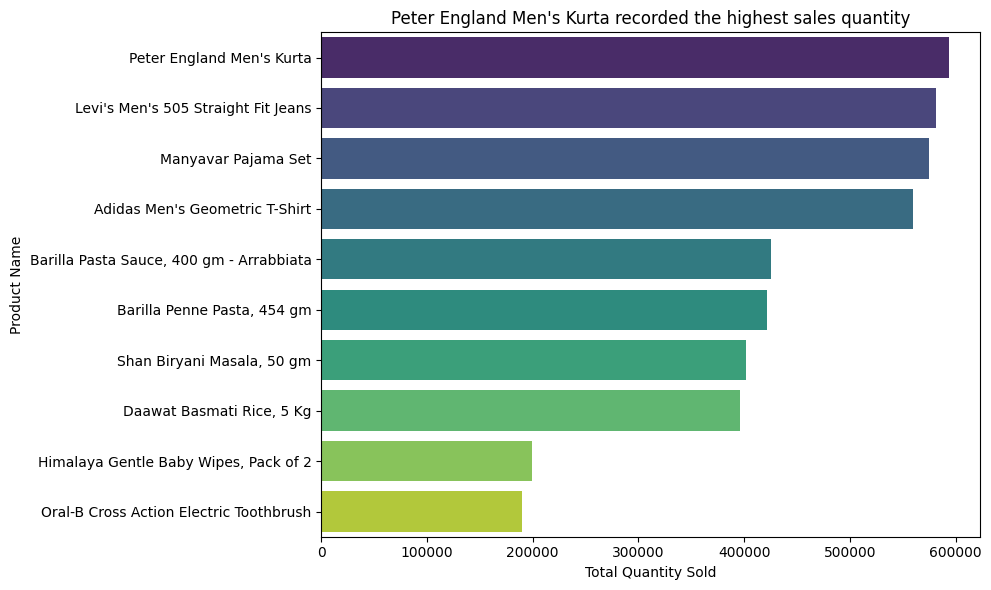

In [4]:
# --- Top Selling Products (by Quantity) ---
print("Analyzing top selling products by quantity...")

# Merge lineitems with products to get product names
merged_sales_df = pd.merge(lineitems_df, products_df, on='product_id')

# Group by product name and sum the quantity
prod_sales_by_name = merged_sales_df.groupby("product_name")["quantity"].sum().reset_index()

# Sort to find the top 10
top_10_products = prod_sales_by_name.sort_values("quantity", ascending=False).head(10)

print("\n--- Top 10 Bestselling Products (by Quantity) ---")
display(top_10_products)

# --- Visualize ---
fig_top_prod, ax_top_prod = plt.subplots(figsize=(10, 6))
sns.barplot(data=top_10_products, x='quantity', y='product_name', ax=ax_top_prod, hue='product_name', palette='viridis', legend=False)
ax_top_prod.set_title("Peter England Men's Kurta recorded the highest sales quantity")
ax_top_prod.set_xlabel('Total Quantity Sold')
ax_top_prod.set_ylabel('Product Name')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Analyzing order volume by customer city...

--- Top 10 Cities by Order Volume ---


location
Bengaluru    77690
Delhi        76911
Kolkata      75691
Hyderabad    75655
Mumbai       75132
Chennai      72080
Lucknow      48673
Nagpur       48475
Jaipur       47565
Bhopal       47013
dtype: int64

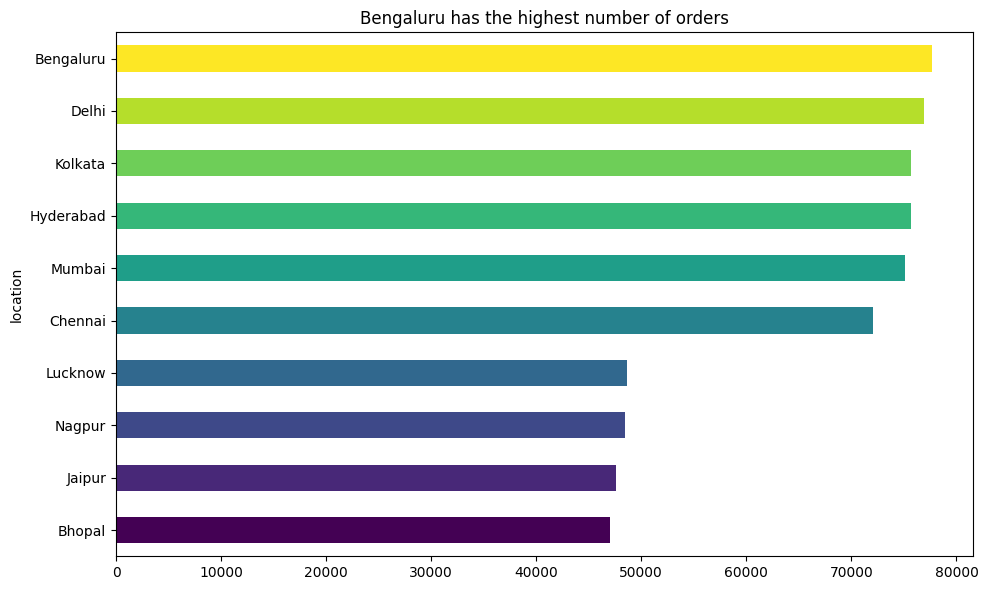

In [5]:
# --- Top Cities by Order Volume ---
print("Analyzing order volume by customer city...")

# Merge orders with customers to get location data
orders_with_location = orders_df.merge(customers_df[['customer_id', 'location']], on='customer_id')

# Group by location and count the number of orders
sales_by_location = orders_with_location.groupby('location').size().sort_values(ascending=False).head(10)

print("\n--- Top 10 Cities by Order Volume ---")
display(sales_by_location)

# --- Visualize ---
fig_top_city, ax_top_city = plt.subplots(figsize=(10, 6))
# Get a list of colors from the viridis colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(sales_by_location)))
sales_by_location.sort_values().plot(kind="barh", ax=ax_top_city, color=colors) # Add the color argument
ax_top_city.set_title('Bengaluru has the highest number of orders')
plt.tight_layout()
plt.show()

Analyzing customer distribution by persona...

--- Customer Count by Persona ---


persona
Family Shopper     4420
Fashionista        3042
Tech Enthusiast    2538
Name: count, dtype: int64


--- Customer Percentage by Persona (%) ---


persona
Family Shopper     44.20
Fashionista        30.42
Tech Enthusiast    25.38
Name: count, dtype: float64

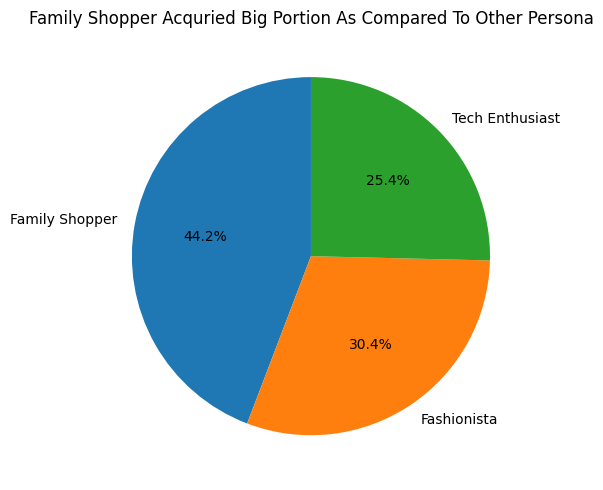

In [6]:
# --- Customer Persona Distribution ---
print("Analyzing customer distribution by persona...")

# Count customers in each persona
persona_counts = customers_df['persona'].value_counts()

# Calculate percentages
persona_percentages = (persona_counts / len(customers_df) * 100).round(2)

print("\n--- Customer Count by Persona ---")
display(persona_counts)

print("\n--- Customer Percentage by Persona (%) ---")
display(persona_percentages)

# --- Visualize ---
fig_persona, ax_persona = plt.subplots(figsize=(8, 5))
persona_counts.plot(kind='pie', ax=ax_persona, autopct='%1.1f%%', startangle=90, legend=False)
ax_persona.set_ylabel('') # Hide the 'persona' label on the y-axis for pie chart
ax_persona.set_title('Family Shopper Acquried Big Portion As Compared To Other Persona')
plt.tight_layout()
plt.show()

Analyzing the top selling product within each category...

--- Top Selling Product by Quantity in Each Category ---


,product_name,quantity
category,,
Electronics,HP Ink Cartridge,151325
Fashion,Peter England Men's Kurta,593358
Groceries,"Barilla Pasta Sauce, 400 gm - Arrabbiata",425639
Personal Care,"Himalaya Gentle Baby Wipes, Pack of 2",199517


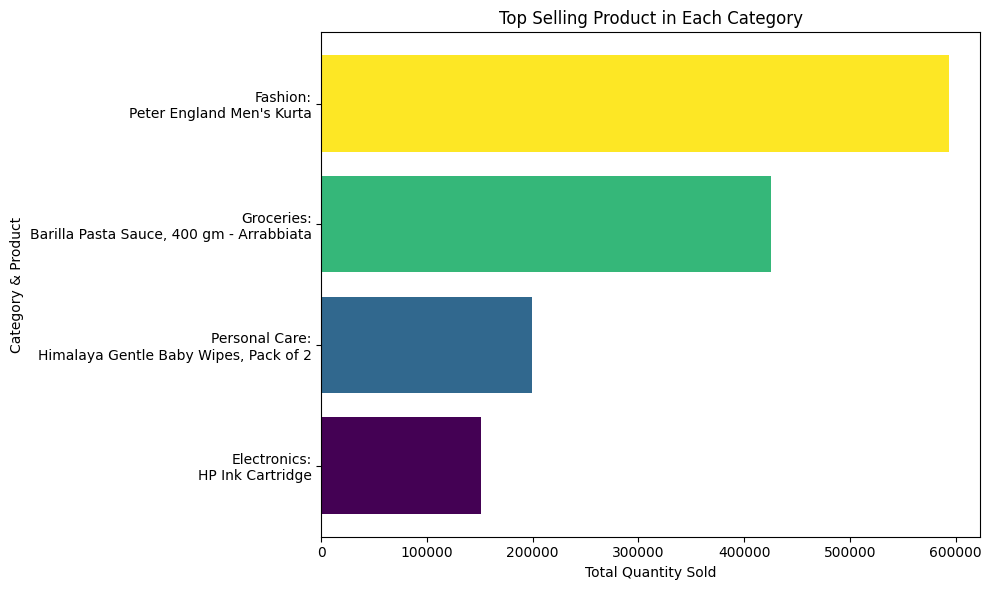

In [7]:
# --- Top Selling Product per Category ---
print("Analyzing the top selling product within each category...")

# --- Make sure these calculations are included in the cell ---
# Merge lineitems with products if not already done in a previous cell that's always run first
# If merged_sales_df doesn't exist, uncomment the line below
# merged_sales_df = pd.merge(lineitems_df, products_df, on='product_id') 

# Group by category and product name, then sum quantities
category_product_sales = merged_sales_df.groupby(['category', 'product_name'])['quantity'].sum().reset_index()

# Find the index of the product with the maximum quantity within each category group
top_product_indices = category_product_sales.loc[category_product_sales.groupby('category')['quantity'].idxmax()]
# --- End of necessary calculations ---

# Sort by category for clearer presentation
top_products_per_category = top_product_indices.sort_values('category').set_index('category')

print("\n--- Top Selling Product by Quantity in Each Category ---")
display(top_products_per_category[['product_name', 'quantity']])

# --- Visualize ---
fig_top_cat_prod, ax_top_cat_prod = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_products_per_category))) 
sorted_data = top_products_per_category.sort_values('quantity', ascending=True)
bars = ax_top_cat_prod.barh(sorted_data.index + ':\n' + sorted_data['product_name'], sorted_data['quantity'], color=colors)
ax_top_cat_prod.set_title('Top Selling Product in Each Category')
ax_top_cat_prod.set_ylabel('Category & Product')
ax_top_cat_prod.set_xlabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

Analyzing the least selling product within each category...

--- Least Selling Product by Quantity in Each Category ---


,product_name,quantity
category,,
Electronics,"Apple iPhone 15 Pro (Black Titanium, 256 GB)",115816
Fashion,Adidas Men's Geometric T-Shirt,559960
Groceries,"Daawat Basmati Rice, 5 Kg",396090
Personal Care,"Pampers Baby Diapers, Pack of 2",138847


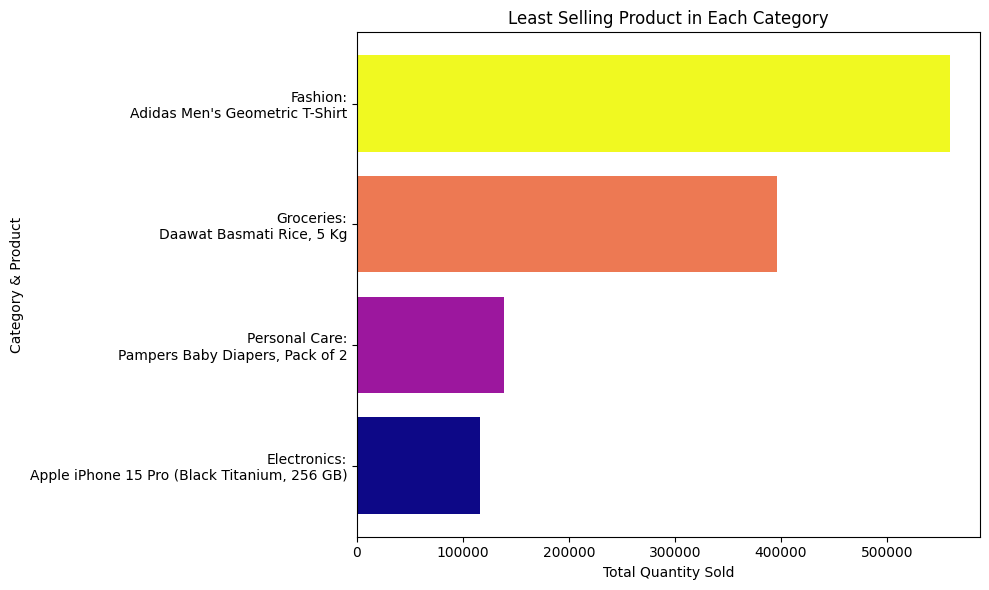

In [8]:
# --- Least Selling Product per Category ---
print("Analyzing the least selling product within each category...")

# --- Make sure these calculations are included in the cell ---
# Group by category and product name, then sum quantities (reuse from previous cell if available)
# If category_product_sales doesn't exist from Cell 6, uncomment the lines below
# merged_sales_df = pd.merge(lineitems_df, products_df, on='product_id') 
# category_product_sales = merged_sales_df.groupby(['category', 'product_name'])['quantity'].sum().reset_index()

# Find the index of the product with the MINIMUM quantity within each category group
bottom_product_indices = category_product_sales.loc[category_product_sales.groupby('category')['quantity'].idxmin()] # <-- Changed idxmax to idxmin
# --- End of necessary calculations ---


# Sort by category for clearer presentation
bottom_products_per_category = bottom_product_indices.sort_values('category').set_index('category')

print("\n--- Least Selling Product by Quantity in Each Category ---")
display(bottom_products_per_category[['product_name', 'quantity']])

# --- Visualize ---
fig_bottom_cat_prod, ax_bottom_cat_prod = plt.subplots(figsize=(10, 6))
colors_bottom = plt.cm.plasma(np.linspace(0, 1, len(bottom_products_per_category))) 
sorted_data_bottom = bottom_products_per_category.sort_values('quantity', ascending=True)
bars_bottom = ax_bottom_cat_prod.barh(sorted_data_bottom.index + ':\n' + sorted_data_bottom['product_name'], sorted_data_bottom['quantity'], color=colors_bottom)
ax_bottom_cat_prod.set_title('Least Selling Product in Each Category')
ax_bottom_cat_prod.set_ylabel('Category & Product')
ax_bottom_cat_prod.set_xlabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

Analyzing order distribution by customer gender...

--- Order Count by Gender ---


gender
Female    596191
Male      318004
Name: count, dtype: int64


--- Order Percentage by Gender (%) ---


gender
Female    65.21
Male      34.79
Name: count, dtype: float64

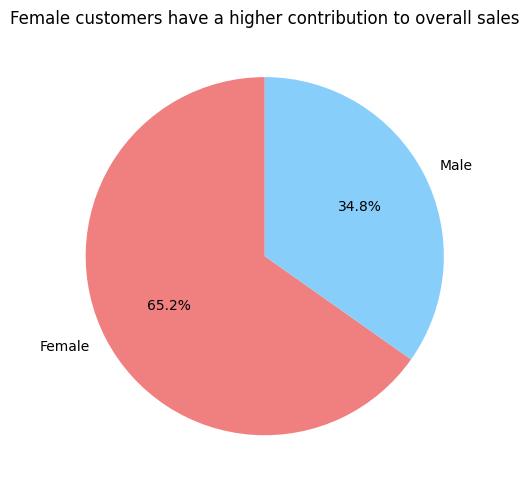

In [9]:
# --- Order Distribution by Gender ---
print("Analyzing order distribution by customer gender...")

# Merge orders with customers to get gender data
orders_with_gender = orders_df.merge(customers_df[['customer_id', 'gender']], on='customer_id')

# Count orders for each gender
gender_order_counts = orders_with_gender['gender'].value_counts()

# Calculate percentages
gender_order_percentages = (gender_order_counts / len(orders_with_gender) * 100).round(2)

print("\n--- Order Count by Gender ---")
display(gender_order_counts)

print("\n--- Order Percentage by Gender (%) ---")
display(gender_order_percentages)

# --- Visualize ---
fig_gender, ax_gender = plt.subplots(figsize=(8, 5))
gender_order_counts.plot(kind='pie', ax=ax_gender, autopct='%1.1f%%', startangle=90, legend=False, colors=['lightcoral', 'lightskyblue'])
ax_gender.set_ylabel('') # Hide the 'gender' label on the y-axis
ax_gender.set_title('Female customers have a higher contribution to overall sales')
plt.tight_layout()
plt.show()

Analyzing category preferences by customer gender...

--- Top Category by Quantity Sold for Each Gender ---


,gender,category,quantity
1,Female,Fashion,1516531
5,Male,Fashion,792917



--- Quantity Sold per Category by Gender ---


gender,Female,Male
category,,
Electronics,671138,373037
Fashion,1516531,792917
Groceries,1074780,570204
Personal Care,681240,361130


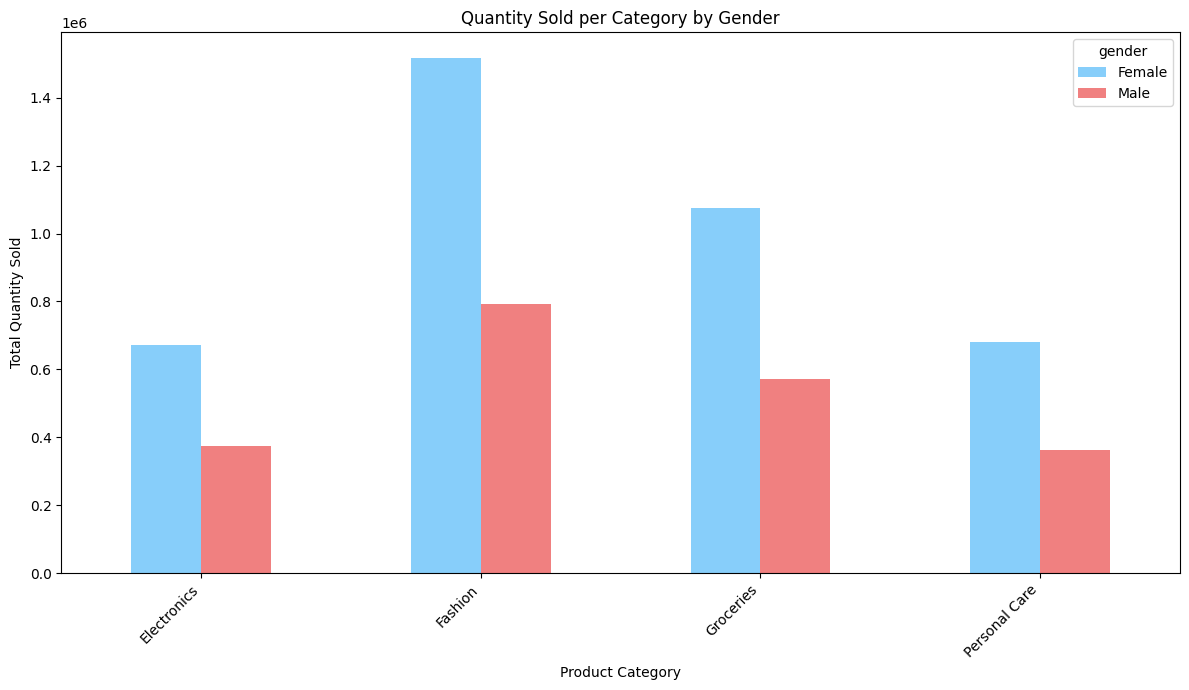

In [10]:
# --- Category Preferences by Gender ---
print("Analyzing category preferences by customer gender...")

# Merge necessary dataframes: lineitems -> products -> orders -> customers
merged_all_df = pd.merge(lineitems_df, products_df, on='product_id')
merged_all_df = pd.merge(merged_all_df, orders_df, on='order_id')
merged_all_df = pd.merge(merged_all_df, customers_df, on='customer_id')

# Group by gender and category, summing the quantity sold
gender_category_sales = merged_all_df.groupby(['gender', 'category'])['quantity'].sum().reset_index()

# Find the top category for each gender
top_categories_by_gender = gender_category_sales.loc[gender_category_sales.groupby('gender')['quantity'].idxmax()]

print("\n--- Top Category by Quantity Sold for Each Gender ---")
display(top_categories_by_gender[['gender', 'category', 'quantity']])

# --- Visualize All Categories by Gender ---
print("\n--- Quantity Sold per Category by Gender ---")
# Pivot the table for easier plotting with seaborn
gender_category_pivot = gender_category_sales.pivot(index='category', columns='gender', values='quantity').fillna(0)
display(gender_category_pivot)

# Create a grouped bar chart
fig_gender_cat, ax_gender_cat = plt.subplots(figsize=(12, 7))
gender_category_pivot.plot(kind='bar', ax=ax_gender_cat, color=['lightskyblue', 'lightcoral'])

ax_gender_cat.set_title('Quantity Sold per Category by Gender')
ax_gender_cat.set_xlabel('Product Category')
ax_gender_cat.set_ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
# --- Top Product per Category by Gender ---
print("Analyzing the top selling product per category, broken down by gender...")

# We still use merged_all_df from the previous cell

# Group by gender, category, and product name, summing the quantity
gender_category_product_sales = merged_all_df.groupby(['gender', 'category', 'product_name'])['quantity'].sum().reset_index()

# Find the index of the product with the maximum quantity within each gender-category group
top_product_indices_gender = gender_category_product_sales.loc[gender_category_product_sales.groupby(['gender', 'category'])['quantity'].idxmax()]

# Sort for clearer presentation
top_products_per_category_gender = top_product_indices_gender.sort_values(['gender', 'category']).set_index(['gender', 'category'])

print("\n--- Top Selling Product by Quantity in Each Category for Each Gender ---")
display(top_products_per_category_gender[['product_name', 'quantity']])

# Optional: Visualize (can be complex, maybe a table is better)
# You could create separate bar charts for Male and Female if desired

Analyzing the top selling product per category, broken down by gender...

--- Top Selling Product by Quantity in Each Category for Each Gender ---


product_name  quantity
gender category                                                         
Female Electronics                            HP Ink Cartridge     97561
       Fashion                       Peter England Men's Kurta    390080
       Groceries      Barilla Pasta Sauce, 400 gm - Arrabbiata    277450
       Personal Care     Himalaya Gentle Baby Wipes, Pack of 2    130954
Male   Electronics                            HP Ink Cartridge     53764
       Fashion                       Peter England Men's Kurta    203278
       Groceries      Barilla Pasta Sauce, 400 gm - Arrabbiata    148189
       Personal Care     Himalaya Gentle Baby Wipes, Pack of 2     68563

Analyzing top selling products by total revenue...

--- Top 10 Products by Revenue ---


,product_name,total_amount_formatted
8,Dell XPS 15 Laptop,₹27.96 B
20,Samsung Galaxy S25 Ultra,₹16.73 B
2,"Apple iPhone 15 Pro (Black Titanium, 256 GB)",₹15.58 B
19,Samsung Galaxy Buds 3 Pro,₹2.22 B
10,HP Smart Tank Printer,₹2.22 B
13,Levi's Men's 505 Straight Fit Jeans,₹1.89 B
18,Peter England Men's Kurta,₹1.21 B
0,Adidas Men's Geometric T-Shirt,₹978.49 M
14,Manyavar Pajama Set,₹957.75 M
7,Dell EcoLoop Urban Backpack,₹542.33 M


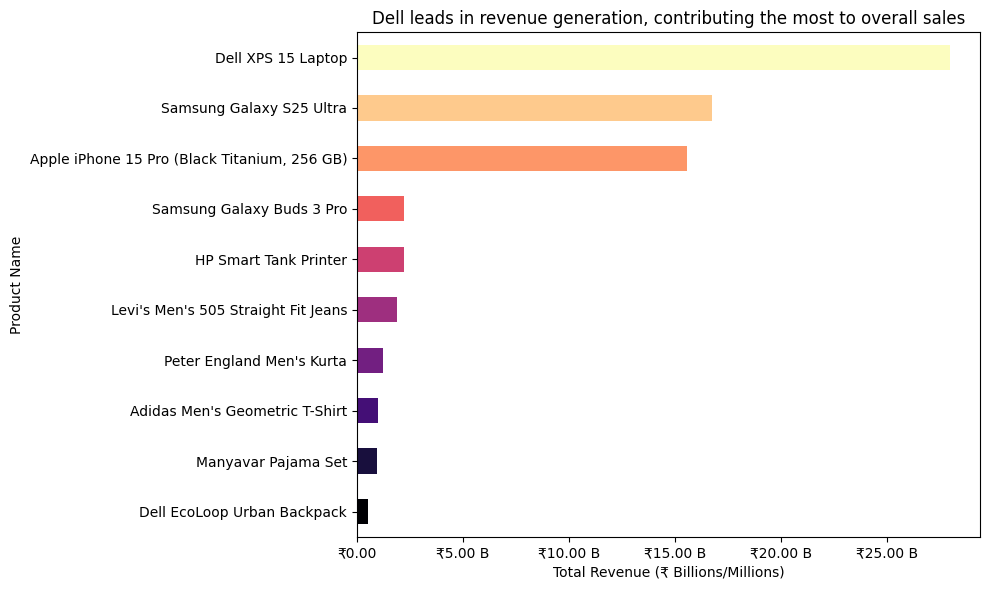

In [12]:
# --- Top Selling Products (by Revenue) ---
print("Analyzing top selling products by total revenue...")

# We use merged_sales_df from Cell 3 which links lineitems and products
# merged_sales_df = pd.merge(lineitems_df, products_df, on='product_id') 

# Group by product name and sum the 'total_amount'
prod_revenue_by_name = merged_sales_df.groupby("product_name")["total_amount"].sum().reset_index()

# Sort to find the top 10 by revenue
top_10_revenue = prod_revenue_by_name.sort_values("total_amount", ascending=False).head(10)

# --- NEW: Format the revenue for display ---
def format_revenue(amount):
    if amount >= 1_000_000_000: # Billion
        return f'₹{amount / 1_000_000_000:.2f} B'
    elif amount >= 1_000_000: # Million
        return f'₹{amount / 1_000_000:.2f} M'
    else:
        return f'₹{amount:,.2f}' # Keep smaller numbers as is

# Create a copy to avoid modifying the original data used for plotting
top_10_display = top_10_revenue.copy()
top_10_display['total_amount_formatted'] = top_10_display['total_amount'].apply(format_revenue)

print("\n--- Top 10 Products by Revenue ---")
# Display the formatted table, hiding the original amount
display(top_10_display[['product_name', 'total_amount_formatted']])
# --- END OF NEW FORMATTING ---

# --- Visualize ---
fig_top_rev, ax_top_rev = plt.subplots(figsize=(10, 6))
colors_rev = plt.cm.magma(np.linspace(0, 1, len(top_10_revenue))) 

# Plotting uses the original numeric 'total_amount'
top_10_revenue.sort_values('total_amount', ascending=True).plot(kind='barh', x='product_name', y='total_amount', ax=ax_top_rev, color=colors_rev, legend=False)

ax_top_rev.set_title('Dell leads in revenue generation, contributing the most to overall sales')
ax_top_rev.set_xlabel('Total Revenue (₹ Billions/Millions)') # Updated label
ax_top_rev.set_ylabel('Product Name')

# --- NEW: Format the x-axis labels on the chart ---
# Use the formatting function for the x-axis ticks
formatter = plt.FuncFormatter(lambda x, pos: format_revenue(x))
ax_top_rev.xaxis.set_major_formatter(formatter)
# --- END OF NEW AXIS FORMATTING ---

plt.tight_layout()
plt.show()

Analyzing yearly sales revenue trend...

--- Total Sales Revenue per Year ---


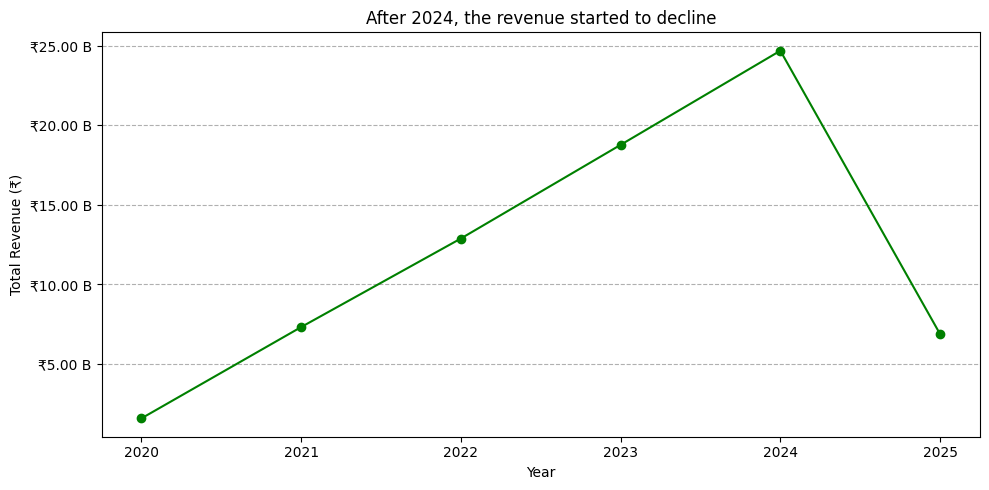

In [13]:
# --- Yearly Sales Revenue Trend ---
print("Analyzing yearly sales revenue trend...")

# --- Make sure these calculations are included and uncommented ---
# Merge lineitems and orders if needed
# If sales_with_dates doesn't exist from a previous cell, uncomment the lines below
# Ensure lineitems_df and orders_df are loaded from Cell 1
sales_with_dates = pd.merge(lineitems_df, orders_df, on='order_id')
sales_with_dates['order_date'] = pd.to_datetime(sales_with_dates['order_date'])
# --- End of necessary calculations ---

# Extract the year from the order_date
sales_with_dates['Year'] = sales_with_dates['order_date'].dt.year

# Group by Year and sum the total_amount
yearly_sales = sales_with_dates.groupby('Year')['total_amount'].sum().sort_index()

print("\n--- Total Sales Revenue per Year ---")
# display(yearly_sales) # Keep this commented if you only want the chart

# --- Visualize ---
fig_yearly_trend, ax_yearly_trend = plt.subplots(figsize=(10, 5))
yearly_sales.plot(kind='line', ax=ax_yearly_trend, marker='o', color='green') # Changed color
ax_yearly_trend.set_title('After 2024, the revenue started to decline')
ax_yearly_trend.set_ylabel("Total Revenue (₹)")
ax_yearly_trend.set_xlabel("Year")

# --- Format the Y-axis labels ---
# Reuse the format_revenue function if defined earlier, otherwise define it here
if 'format_revenue' not in globals():
    def format_revenue(amount):
        if amount >= 1_000_000_000: # Billion
            return f'₹{amount / 1_000_000_000:.2f} B'
        elif amount >= 1_000_000: # Million
            return f'₹{amount / 1_000_000:.2f} M'
        else:
            return f'₹{amount:,.2f}'

formatter_y = plt.FuncFormatter(lambda y, pos: format_revenue(y))
ax_yearly_trend.yaxis.set_major_formatter(formatter_y)
# --- End of Y-axis formatting ---

# Set x-axis ticks to show every year
ax_yearly_trend.set_xticks(yearly_sales.index)
ax_yearly_trend.set_xticklabels(yearly_sales.index)

plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Analyzing payment method popularity...

--- Order Count by Payment Method ---


payment_method
UPI                 365783
Cash on Delivery    228234
Credit Card         136993
Debit Card           91644
Net Banking          45803
E-Wallet             45738
Name: count, dtype: int64


--- Order Percentage by Payment Method (%) ---


payment_method
UPI                 40.01
Cash on Delivery    24.97
Credit Card         14.99
Debit Card          10.02
Net Banking          5.01
E-Wallet             5.00
Name: count, dtype: float64

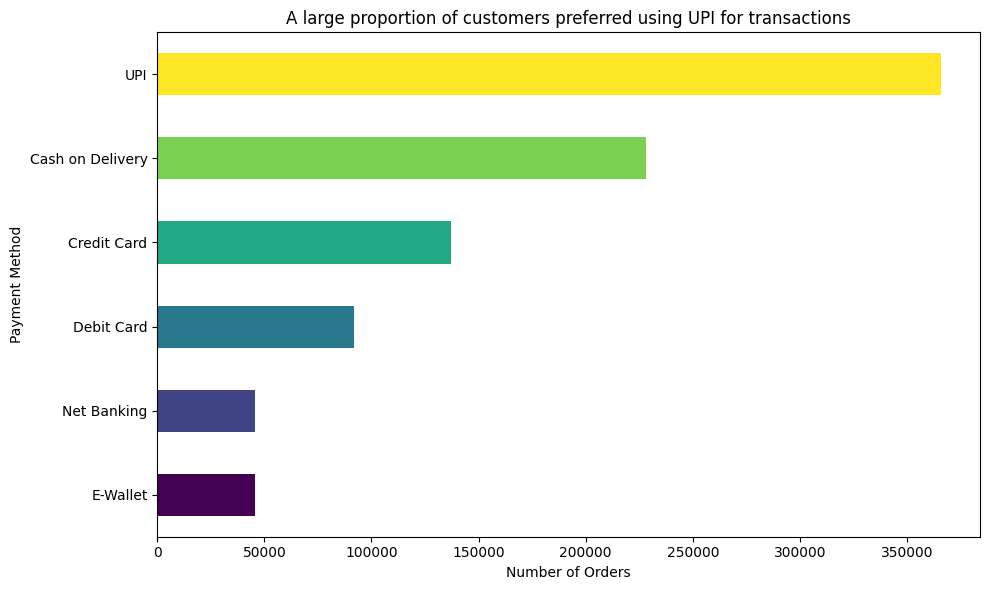

In [14]:
# --- Payment Method Analysis ---
print("Analyzing payment method popularity...")

# Count the occurrences of each payment method
payment_counts = orders_df['payment_method'].value_counts()

# Calculate percentages
payment_percentages = (payment_counts / len(orders_df) * 100).round(2)

print("\n--- Order Count by Payment Method ---")
display(payment_counts)

print("\n--- Order Percentage by Payment Method (%) ---")
display(payment_percentages)

# --- Visualize ---
fig_payment, ax_payment = plt.subplots(figsize=(10, 6))
payment_counts.sort_values().plot(kind='barh', ax=ax_payment, color=plt.cm.viridis(np.linspace(0, 1, len(payment_counts))))
ax_payment.set_title('A large proportion of customers preferred using UPI for transactions')
ax_payment.set_xlabel('Number of Orders')
ax_payment.set_ylabel('Payment Method')
plt.tight_layout()
plt.show()

Analyzing payment method popularity by gender...

--- Order Count by Payment Method and Gender ---


gender,Female,Male,Total
payment_method,,,
UPI,238398,127385,365783
Cash on Delivery,149328,78906,228234
Credit Card,88986,48007,136993
Debit Card,59782,31862,91644
Net Banking,29874,15929,45803
E-Wallet,29823,15915,45738


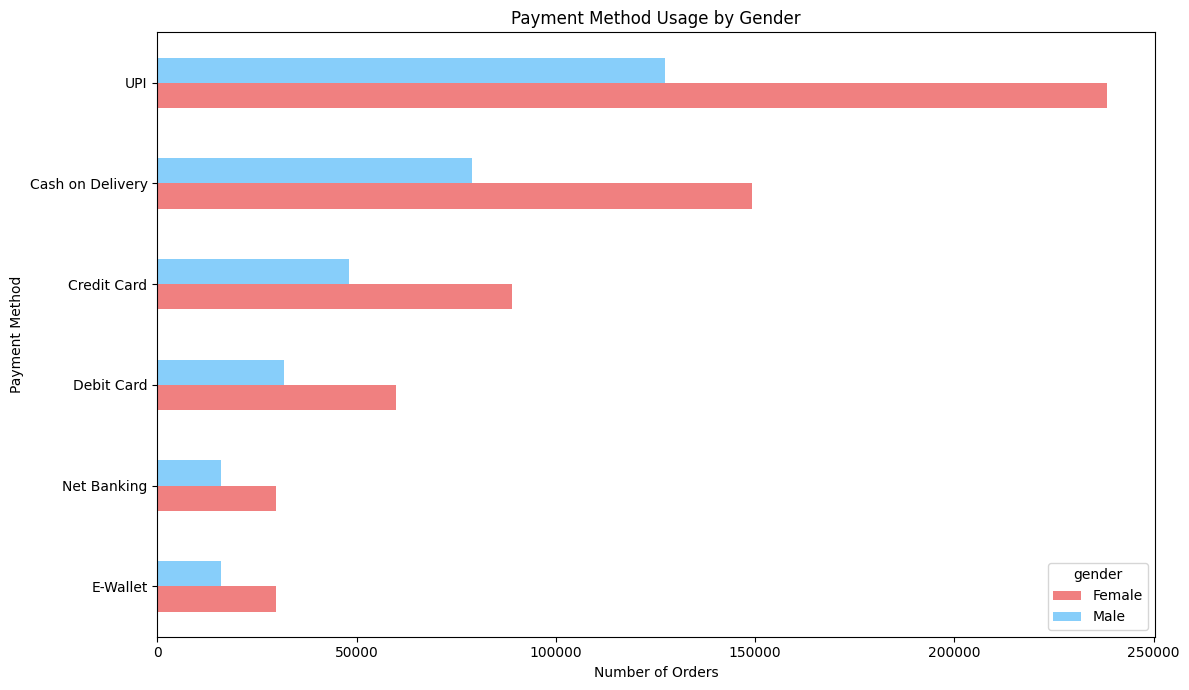

In [15]:
# --- Payment Method Analysis by Gender ---
print("Analyzing payment method popularity by gender...")

# Use orders_with_gender from Cell 8
# orders_with_gender = orders_df.merge(customers_df[['customer_id', 'gender']], on='customer_id')

# Group by gender and payment method, then count occurrences
payment_by_gender = orders_with_gender.groupby(['gender', 'payment_method']).size().reset_index(name='count')

print("\n--- Order Count by Payment Method and Gender ---")
# Pivot for better readability
payment_pivot = payment_by_gender.pivot(index='payment_method', columns='gender', values='count').fillna(0)
# Add a total column for context
payment_pivot['Total'] = payment_pivot.sum(axis=1)
# Sort by total popularity
payment_pivot = payment_pivot.sort_values('Total', ascending=False)
display(payment_pivot)


# --- Visualize ---
fig_payment_gender, ax_payment_gender = plt.subplots(figsize=(12, 7))

# --- CORRECTED CODE ---
# Sort the full pivot table by 'Total' FIRST
payment_pivot_sorted = payment_pivot.sort_values('Total')

# THEN select only the 'Female' and 'Male' columns for plotting
payment_pivot_sorted[['Female', 'Male']].plot(kind='barh', ax=ax_payment_gender, color=['lightcoral', 'lightskyblue'])
# --- END OF CORRECTION ---

ax_payment_gender.set_title('Payment Method Usage by Gender')
ax_payment_gender.set_xlabel('Number of Orders')
ax_payment_gender.set_ylabel('Payment Method')
plt.tight_layout()
plt.show()

Finding unique product names with a rating of 4.5 or higher...

Found 22 unique product names with at least one instance rated 4.5 or higher.

--- Unique Products Rated 4.5 or Higher (Top 20 Sample) ---


,product_name,brand,category,rating
2,Samsung Galaxy S25 Ultra,Samsung,Electronics,4.9
8,Peter England Men's Kurta,Peter England,Fashion,4.9
6,HP Smart Tank Printer,HP,Electronics,4.9
813,Adidas Men's Geometric T-Shirt,Adidas,Fashion,4.8
66,"Himalaya Gentle Baby Wipes, Pack of 2",Himalaya,Personal Care,4.8
848,Samsung Galaxy Buds 3 Pro,Samsung,Electronics,4.8
15,"Pantene Silky Smooth Conditioner, 500ml",Pantene,Personal Care,4.8
356,"Pampers Baby Diapers, Pack of 2",Pampers,Personal Care,4.8
46,Oral-B Cross Action Electric Toothbrush,Oral-B,Personal Care,4.8
157,Manyavar Pajama Set,Manyavar,Fashion,4.8


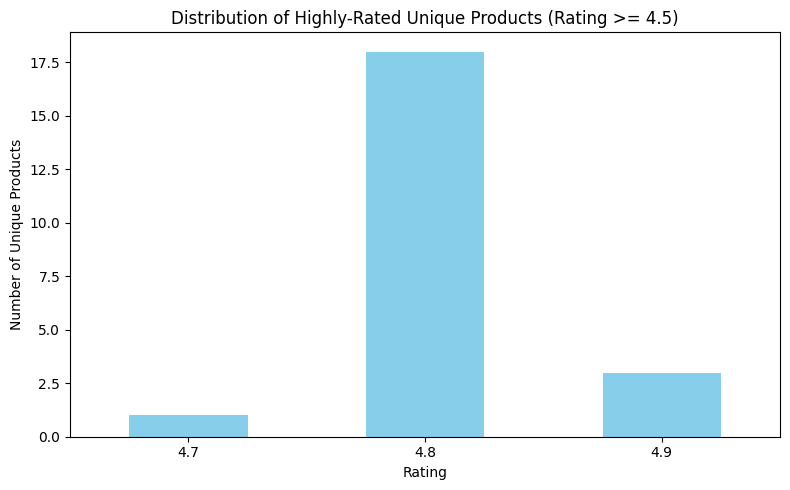

In [16]:
# --- Find Unique Highly-Rated Products (Rating >= 4.5) ---
print("Finding unique product names with a rating of 4.5 or higher...")

# Define the rating threshold
rating_threshold = 4.5

# Filter the products dataframe for individual products meeting the threshold
highly_rated_products = products_df[products_df['rating'] >= rating_threshold]

# Sort by product name and then by rating (descending) so the highest rating comes first for each name
highly_rated_products_sorted = highly_rated_products.sort_values(by=['product_name', 'rating'], ascending=[True, False])

# Drop duplicate product names, keeping the first occurrence (which has the highest rating due to sorting)
unique_highly_rated = highly_rated_products_sorted.drop_duplicates(subset=['product_name'], keep='first')

# Sort the final unique list by rating (descending) for display
unique_highly_rated_final = unique_highly_rated.sort_values(by='rating', ascending=False)


print(f"\nFound {len(unique_highly_rated_final)} unique product names with at least one instance rated {rating_threshold} or higher.")

print(f"\n--- Unique Products Rated {rating_threshold} or Higher (Top 20 Sample) ---")
# Display relevant columns
display(unique_highly_rated_final[['product_name', 'brand', 'category', 'rating']].head(20))

# --- Optional: Visualize the distribution ---
if not unique_highly_rated_final.empty:
    fig_high_rating, ax_high_rating = plt.subplots(figsize=(8, 5))
    rating_counts = unique_highly_rated_final['rating'].value_counts().sort_index()
    rating_counts.plot(kind='bar', ax=ax_high_rating, color='skyblue')
    ax_high_rating.set_title(f'Distribution of Highly-Rated Unique Products (Rating >= {rating_threshold})')
    ax_high_rating.set_xlabel('Rating')
    ax_high_rating.set_ylabel('Number of Unique Products')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

Analyzing the trend of Average Order Value (AOV) over time...

--- Average Order Value per Month (Sample) ---


Month
2020-04    77287.652150
2020-05    68071.163514
2020-06    74650.186641
2020-07    77538.476142
2020-08    70698.834161
dtype: float64

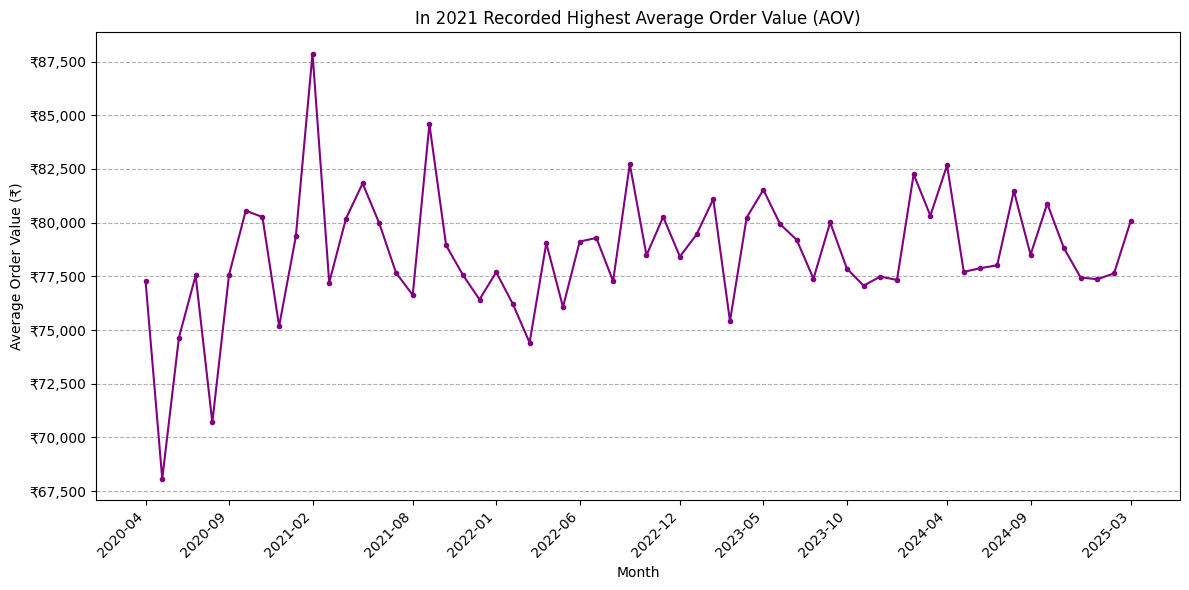

In [17]:
# --- Average Order Value (AOV) Trend ---
print("Analyzing the trend of Average Order Value (AOV) over time...")

# --- Make sure these lines are included and uncommented ---
# Merge necessary dataframes
sales_with_dates = pd.merge(lineitems_df, orders_df, on='order_id')
# Convert order_date to datetime
sales_with_dates['order_date'] = pd.to_datetime(sales_with_dates['order_date'])
# Create the 'Month' column
sales_with_dates['Month'] = sales_with_dates['order_date'].dt.to_period('M').astype(str)
# --- End of required calculations ---

# Calculate total monthly revenue
monthly_revenue = sales_with_dates.groupby('Month')['total_amount'].sum()

# Calculate total unique monthly orders
monthly_orders = sales_with_dates.groupby('Month')['order_id'].nunique()

# Calculate AOV for each month
# Add a check to avoid division by zero if a month has no orders (unlikely but safe)
monthly_aov = monthly_revenue.divide(monthly_orders, fill_value=0).sort_index()

print("\n--- Average Order Value per Month (Sample) ---")
display(monthly_aov.head())

# --- Visualize ---
fig_aov_trend, ax_aov_trend = plt.subplots(figsize=(12, 6))
monthly_aov.plot(kind='line', ax=ax_aov_trend, marker='.', color='purple')
ax_aov_trend.set_title('In 2021 Recorded Highest Average Order Value (AOV)') # Updated title
ax_aov_trend.set_ylabel("Average Order Value (₹)")
ax_aov_trend.set_xlabel("Month")

# --- Format Y-axis ---
formatter_y_aov = plt.FuncFormatter(lambda y, pos: f'₹{y:,.0f}')
ax_aov_trend.yaxis.set_major_formatter(formatter_y_aov)

# Use numpy for evenly spaced x-axis labels
tick_positions_aov = np.linspace(0, len(monthly_aov.index) - 1, 12, dtype=int)
tick_labels_aov = monthly_aov.index[tick_positions_aov]
ax_aov_trend.set_xticks(tick_positions_aov)
ax_aov_trend.set_xticklabels(tick_labels_aov, rotation=45, ha='right')

plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [18]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
import random

# --- Market Basket Analysis ---
print("Performing Market Basket Analysis using FP-Growth...")

# -- Step 1: Sample the data (MBA is computationally intensive) --
# Get unique order IDs
all_order_ids = lineitems_df['order_id'].unique()
# Define sample size (limit to 50k orders or total orders if less)
sample_size = min(50000, len(all_order_ids))

if sample_size > 1:
    print(f"Analyzing a sample of {sample_size} orders...")
    sampled_order_ids = random.sample(list(all_order_ids), sample_size)
    sampled_lineitems = lineitems_df[lineitems_df['order_id'].isin(sampled_order_ids)]
else:
    print("Not enough data for Market Basket Analysis.")
    sampled_lineitems = None # Set to None if not enough data

if sampled_lineitems is not None:
    # -- Step 2: Create the transaction matrix (basket) --
    # Use product_id for analysis, map to names later
    basket = sampled_lineitems.groupby(['order_id', 'product_id'])['quantity'].count().unstack(fill_value=0)
    # Convert counts to 0 or 1 (item present or not)
    basket_sets = basket.map(lambda x: 1 if x > 0 else 0)

    # -- Step 3: Apply FP-Growth --
    # Use a low min_support because the dataset is large and diverse
    frequent_itemsets = fpgrowth(basket_sets, min_support=0.0005, use_colnames=True)

    if not frequent_itemsets.empty:
        # -- Step 4: Generate Association Rules --
        # Find rules with confidence > 0 (we'll sort later)
        rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1) # Require at least 10% confidence

        if not rules_df.empty:
            # Sort rules by lift or confidence for better insights
            rules_sorted = rules_df.sort_values(["lift", "confidence"], ascending=[False, False])

            # Map product IDs back to names for readability
            product_names_map = products_df.set_index('product_id')['product_name'].to_dict()
            rules_sorted['antecedents'] = rules_sorted['antecedents'].apply(lambda x: ', '.join([product_names_map.get(i, i) for i in x]))
            rules_sorted['consequents'] = rules_sorted['consequents'].apply(lambda x: ', '.join([product_names_map.get(i, i) for i in x]))

            print("\n--- Top 10 Association Rules (Sorted by Lift, then Confidence) ---")
            display(rules_sorted.head(10)[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
        else:
            print("No association rules found meeting the minimum confidence threshold.")
    else:
        print("No frequent itemsets found with the current min_support setting.")

Performing Market Basket Analysis using FP-Growth...
Analyzing a sample of 50000 orders...


c:\Users\Lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



--- Top 10 Association Rules (Sorted by Lift, then Confidence) ---


,antecedents,consequents,support,confidence,lift
6,"Barilla Penne Pasta, 454 gm","Barilla Pasta Sauce, 400 gm - Arrabbiata",0.00072,0.947368,607.287449
7,"Barilla Pasta Sauce, 400 gm - Arrabbiata","Barilla Penne Pasta, 454 gm",0.00072,0.461538,607.287449
9,Dell XPS 15 Laptop,Dell EcoLoop Urban Backpack,0.00094,0.886792,434.702183
8,Dell EcoLoop Urban Backpack,Dell XPS 15 Laptop,0.00094,0.460784,434.702183
2,Apple USB-C Power Adapter,"Apple iPhone 15 Pro (Black Titanium, 256 GB)",0.00094,0.552941,431.985294
3,"Apple iPhone 15 Pro (Black Titanium, 256 GB)",Apple USB-C Power Adapter,0.00094,0.734375,431.985294
4,HP Smart Tank Printer,HP Ink Cartridge,0.00114,0.850746,425.373134
5,HP Ink Cartridge,HP Smart Tank Printer,0.00114,0.570000,425.373134
1,Peter England Men's Kurta,Manyavar Pajama Set,0.00084,0.736842,375.939850
0,Manyavar Pajama Set,Peter England Men's Kurta,0.00084,0.428571,375.939850


In [19]:
# --- RFM Analysis ---
print("Calculating RFM scores...")

# Calculate Recency
most_recent_date = pd.to_datetime(orders_df['order_date']).max()
recent_dates = orders_df.groupby("customer_id")["order_date"].max().reset_index()
recent_dates["Recency"] = (most_recent_date - pd.to_datetime(recent_dates["order_date"])).dt.days

# Calculate Frequency
freq = orders_df.groupby("customer_id").size().reset_index(name="Frequency")

# Calculate Monetary
lineitems_orders = pd.merge(lineitems_df, orders_df[["order_id", "customer_id"]], on="order_id")
monetary = lineitems_orders.groupby("customer_id")["total_amount"].sum().reset_index(name="Monetary")

# Merge R, F, M
rfm_df = pd.merge(recent_dates[["customer_id", "Recency"]], freq, on="customer_id")
rfm_df = pd.merge(rfm_df, monetary, on="customer_id")

# Function to assign quartile scores (1-4, handling potential errors)
def safe_qcut(series, q=4, reverse=False):
    try:
        labels = list(range(1, q + 1))
        if reverse: labels = labels[::-1]
        # Use qcut for quartile calculation, drop duplicates to handle ties
        return pd.qcut(series, q, labels=labels, duplicates='drop')
    except ValueError:
        # If qcut fails (e.g., all values are the same), assign score 1
        return pd.Series([1] * len(series), index=series.index)

# Assign R, F, M scores
rfm_df["R_Quartile"] = safe_qcut(rfm_df["Recency"], reverse=True) # Higher score for lower recency
rfm_df["F_Quartile"] = safe_qcut(rfm_df["Frequency"])             # Higher score for higher frequency
rfm_df["M_Quartile"] = safe_qcut(rfm_df["Monetary"])              # Higher score for higher monetary value

# Create combined RFM score
rfm_df["RFM_Score"] = rfm_df["R_Quartile"].astype(str) + rfm_df["F_Quartile"].astype(str) + rfm_df["M_Quartile"].astype(str)

# --- Display Results ---
print("\n--- RFM Analysis Results (Sample) ---")
display(rfm_df.head())

# Identify High-Value and At-Risk segments
high_value_customers = rfm_df[rfm_df["RFM_Score"] == '444']
at_risk_customers = rfm_df[rfm_df["R_Quartile"] == 1] # Customers with low recency score

print(f"\nFound {len(high_value_customers)} High-Value customers (Score 444).")
print("--- High-Value Customers (Sample) ---")
display(high_value_customers.head())

print(f"\nFound {len(at_risk_customers)} At-Risk customers (Recency Score 1).")
print("--- At-Risk Customers (Sample) ---")
display(at_risk_customers.head())

Calculating RFM scores...

--- RFM Analysis Results (Sample) ---


,customer_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
0,1,5,77,14868296.93,3,2,4,324
1,2,16,117,2558821.61,1,3,2,132
2,3,5,30,509771.66,3,1,1,311
3,4,6,155,2971141.94,3,4,2,342
4,5,23,94,1817354.80,1,3,2,132



Found 237 High-Value customers (Score 444).
--- High-Value Customers (Sample) ---


,customer_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
36,37,1,142,5709515.24,4,4,4,444
51,52,1,182,5625750.97,4,4,4,444
202,203,0,160,5651614.10,4,4,4,444
216,217,2,190,41515474.06,4,4,4,444
220,221,0,161,39658290.96,4,4,4,444



Found 2446 At-Risk customers (Recency Score 1).
--- At-Risk Customers (Sample) ---


,customer_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
1,2,16,117,2558821.61,1,3,2,132
4,5,23,94,1817354.80,1,3,2,132
6,7,18,149,2990973.36,1,4,2,142
16,17,20,122,3217518.94,1,3,3,133
17,18,16,52,1907709.52,1,2,2,122


Performing K-Means clustering based on RFM values...
Finding optimal number of clusters using the Elbow Method...


  File "c:\Users\Lenovo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Lenovo\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


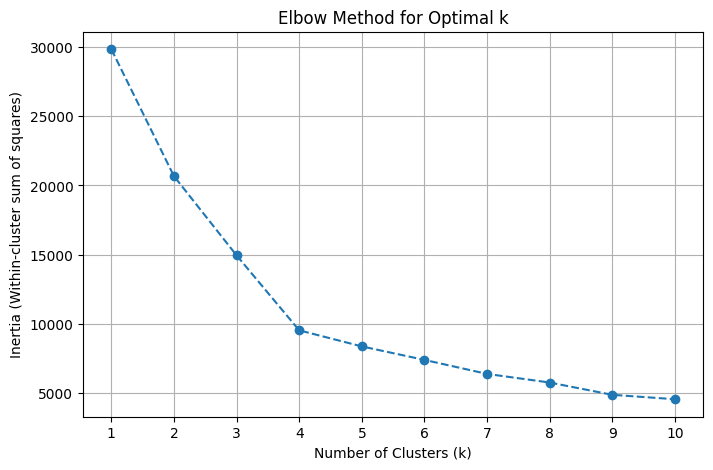

Based on the elbow plot, choosing k=4 clusters.
Running K-Means with k=4...

--- Analyzing Cluster Characteristics (Average RFM) ---


,Recency,Frequency,Monetary,Size
Cluster,,,,
0,6.47,138.55,4011499.95,3222
1,29.95,86.49,4622654.72,1176
2,8.54,133.53,30420741.49,1363
3,6.40,43.96,2942391.94,4187



--- Visualizing Clusters (Recency vs Frequency) ---


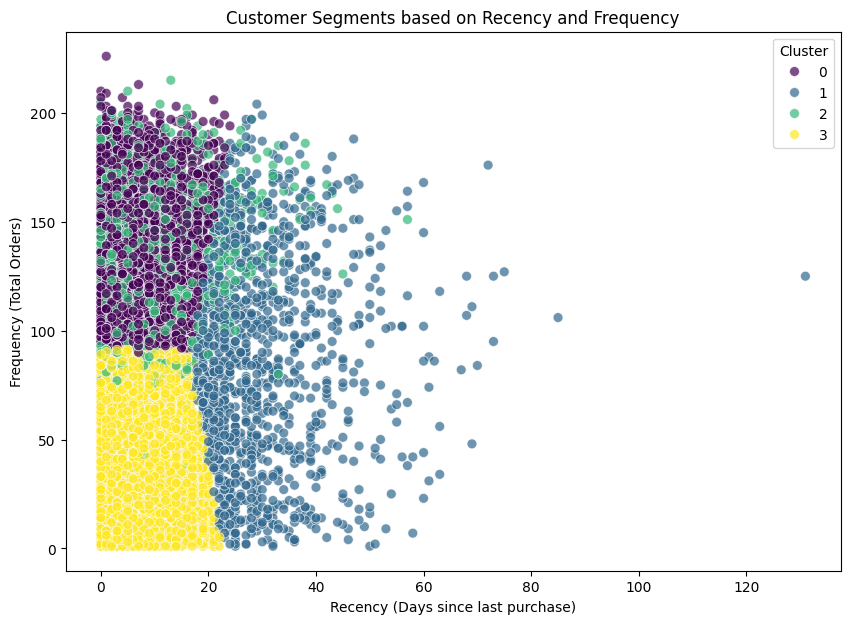

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

# --- K-Means Customer Segmentation ---
print("Performing K-Means clustering based on RFM values...")

# Filter out potential outliers or inactive customers for better clustering
# (e.g., customers with 0 frequency or monetary value if they exist)
rfm_for_clustering = rfm_df[rfm_df['Frequency'] > 0]
rfm_for_clustering = rfm_for_clustering[rfm_for_clustering['Monetary'] > 0]

# -- Step 1: Select and Scale Features --
# Select the R, F, M numerical values
features = rfm_for_clustering[['Recency', 'Frequency', 'Monetary']]

# Scale the features (important for distance-based algorithms like K-Means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# -- Step 2: Determine Optimal Number of Clusters (Elbow Method) --
print("Finding optimal number of clusters using the Elbow Method...")
inertia = []
k_range = range(1, 11) # Check for 1 to 10 clusters

# Suppress ConvergenceWarning during elbow method calculation
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for k in k_range:
        kmeans_elbow = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans_elbow.fit(scaled_features)
        inertia.append(kmeans_elbow.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Based on the elbow plot, choose the optimal 'k' (e.g., where the curve bends)
# Let's assume k=4 based on typical RFM segmentation
optimal_k = 4
print(f"Based on the elbow plot, choosing k={optimal_k} clusters.")

# -- Step 3: Run K-Means with Optimal k --
print(f"Running K-Means with k={optimal_k}...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(scaled_features)

# Add the cluster labels back to the dataframe
rfm_for_clustering['Cluster'] = kmeans.labels_

# -- Step 4: Analyze Cluster Characteristics --
print("\n--- Analyzing Cluster Characteristics (Average RFM) ---")
cluster_analysis = rfm_for_clustering.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
# Add cluster size
cluster_analysis['Size'] = rfm_for_clustering['Cluster'].value_counts()
display(cluster_analysis)

# -- Step 5: Visualize Clusters (using R and F for simplicity) --
print("\n--- Visualizing Clusters (Recency vs Frequency) ---")
plt.figure(figsize=(10, 7))
sns.scatterplot(data=rfm_for_clustering, x='Recency', y='Frequency', hue='Cluster', palette='viridis', s=50, alpha=0.7)
plt.title('Customer Segments based on Recency and Frequency')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Frequency (Total Orders)')
plt.legend(title='Cluster')
plt.show()

Detecting potentially fraudulent orders using Isolation Forest...

Found 5418 potentially fraudulent orders (anomalies based on quantity).

--- Sample of Potentially Fraudulent Orders ---


,order_id,quantity,anomaly
1,2,96,-1
155,156,83,-1
210,211,18,-1
532,533,18,-1
986,987,18,-1
1790,1791,64,-1
1872,1873,19,-1
1997,1998,18,-1
2121,2122,18,-1
2187,2188,19,-1


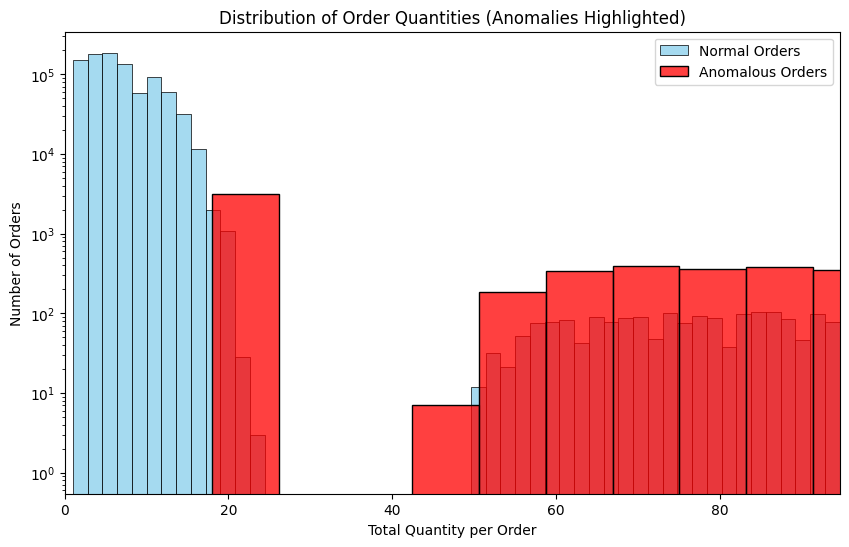

In [21]:
from sklearn.ensemble import IsolationForest

# --- Fraud Detection (Anomaly Detection) ---
print("Detecting potentially fraudulent orders using Isolation Forest...")

# -- Step 1: Prepare Features --
# Aggregate total quantity per order
order_quantities = lineitems_df.groupby('order_id')['quantity'].sum().reset_index()

# Select the feature for anomaly detection (total quantity)
# Use double brackets to keep it as a DataFrame
features_fraud = order_quantities[['quantity']] 

# Handle potential cases where quantity might be zero or negative if data is unusual
features_fraud = features_fraud[features_fraud['quantity'] > 0]
order_quantities = order_quantities[order_quantities['quantity'] > 0]

if features_fraud.empty:
    print("No valid order quantity data found for fraud detection.")
else:
    # -- Step 2: Apply Isolation Forest --
    # contamination='auto' or a small float like 0.01 (1% are anomalies)
    model = IsolationForest(contamination=0.01, random_state=42) 
    
    # Fit the model and predict anomalies (-1 for anomalies, 1 for normal)
    order_quantities['anomaly'] = model.fit_predict(features_fraud)
    
    # Filter to find the potentially fraudulent orders
    fraudulent_orders = order_quantities[order_quantities['anomaly'] == -1]
    
    # -- Step 3: Display Results --
    print(f"\nFound {len(fraudulent_orders)} potentially fraudulent orders (anomalies based on quantity).")
    
    print("\n--- Sample of Potentially Fraudulent Orders ---")
    display(fraudulent_orders.head(10)) # Show up to 10 examples
    
    # -- Step 4: Visualize (Optional) ---
    plt.figure(figsize=(10, 6))
    sns.histplot(order_quantities['quantity'], bins=100, kde=False, label='Normal Orders', color='skyblue')
    # Overlay the anomalies
    sns.histplot(fraudulent_orders['quantity'], bins=20, kde=False, label='Anomalous Orders', color='red')
    
    plt.title('Distribution of Order Quantities (Anomalies Highlighted)')
    plt.xlabel('Total Quantity per Order')
    plt.ylabel('Number of Orders')
    plt.yscale('log') # Use log scale on y-axis due to large differences in counts
    plt.legend()
    # Limit x-axis if extreme outliers skew the plot too much
    plt.xlim(0, order_quantities['quantity'].quantile(0.999) * 1.1) 
    plt.show()

In [22]:
# --- Customer Personalization (Recommendation by Persona) ---
print("Generating product recommendations based on persona...")

# Merge necessary dataframes if not already done (use merged_all_df from Cell 9)
# merged_all_df = pd.merge(lineitems_df, products_df, on='product_id')
# merged_all_df = pd.merge(merged_all_df, orders_df, on='order_id')
# merged_all_df = pd.merge(merged_all_df, customers_df, on='customer_id')

recommendations = {}
# Find the most frequently ordered product name for each persona
for persona in merged_all_df['persona'].unique():
    # Filter data for the current persona
    persona_data = merged_all_df[merged_all_df['persona'] == persona]
    # Find the most frequent product name within that persona's orders
    # .mode()[0] gets the most frequent value (handling potential ties by taking the first)
    top_product = persona_data['product_name'].mode()[0]
    recommendations[persona] = top_product

# Convert the dictionary to a DataFrame for better display
recommendations_df = pd.DataFrame(list(recommendations.items()), columns=['Persona', 'Top Product Recommendation'])

print("\n--- Top Product Recommendation per Persona ---")
display(recommendations_df.set_index('Persona'))

Generating product recommendations based on persona...

--- Top Product Recommendation per Persona ---


,Top Product Recommendation
Persona,
Family Shopper,"Barilla Pasta Sauce, 400 gm - Arrabbiata"
Fashionista,Peter England Men's Kurta
Tech Enthusiast,HP Ink Cartridge
